In [1]:
from functools import reduce
import pathlib
import pandas as pd 
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from adjustText import adjust_text # https://stackoverflow.com/questions/34693991/repel-annotations-in-matplotlib

# sys.path.append('/rumi/shams/abe/CanDI/')
sys.path.append('/data_gilbert2/backups/aarab/CanDI')

from CanDI import candi as can

In [2]:
sys.path.append('..')

from scripts.candi_functions import *

In [3]:
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')


#### c5_go_gmt

In [4]:
# import blitzgsea as blitz

In [5]:
# pager_annotation_path = '/data_gilbert/home/aarab/tools/pager/annotations/human'

In [6]:
# c5_go_gmt = blitz.enrichr.read_gmt(
#     f'{pager_annotation_path}/msigdb_v7.4_c5.go/c5.go.v7.4.symbols.gmt'
# )

# 

___

In [7]:
from venn import venn 

In [8]:
wd = '/data_gilbert/home/aarab/AML/Decitabine-treatment'

In [9]:
# import cancer_data as candata

In [10]:
# from glob import glob
# import bioinfokit
# bioinfokit.__version__

In [11]:
from scripts.util import *

In [12]:
aml = can.Cancer("Leukemia", subtype='AML')

# Number of Leukemia lines
print(len(aml.depmap_ids))

54


In [13]:
our_aml_panel = can.data.cell_lines[can.data.cell_lines.cell_line_name.isin([
    "SKM-1","MOLM-13",'HL-60',
    'MOLM-14','OCI-AML3','KG-1'
])].cell_line_name.to_dict()

In [14]:
# lu.depmap_ids
can.data.cell_lines.loc[
    can.data.cell_lines.cell_line_name.isin(our_aml_panel.values()),:
].set_index('cell_line_name')[['Subtype']]

,Subtype
cell_line_name,
HL-60,"Acute Myelogenous Leukemia (AML), M3 (Promyelo..."
OCI-AML3,"Acute Myelogenous Leukemia (AML), M4 (Myelomon..."
MOLM-13,Acute Myelogenous Leukemia (AML)
SKM-1,Acute Myelogenous Leukemia (AML)
KG-1,Acute Myelogenous Leukemia (AML)
MOLM-14,Acute Myelogenous Leukemia (AML)


# 

In [15]:
not_aml = can.CellLineCluster(list(set(can.data.cell_lines.index) - set(aml.depmap_ids)))

In [16]:
candi = can.CellLineCluster(can.data.cell_lines.index.to_list())

In [17]:
# sns.stripplot(data=df.query('name == "other"').copy(), jitter=True,x="gene", y="expression", size=2,color='black', alpha=.1)
# sns.stripplot(data=df.query('name != "other"').copy(), jitter=True,x="gene", y="expression", size=3,hue="name", alpha=.8)


# 

In [18]:
# candi_exp = candi.rnaseq_reads

# candi_exp_norm = deseq2_norm(candi_exp + 1)[0]#log2_tpm_normalization(aml_exp)

In [19]:
# # genes = our_aml_panel
# df = candi_exp_norm.loc[genes,:].reset_index().melt(id_vars=['gene'],var_name='cell_line',value_name='expression')
# df['primary_disease'] = can.data.cell_lines['primary_disease'][df['cell_line']].to_list()
# df['primary_disease'] = pd.Categorical(
#     df['primary_disease'], categories=df.groupby('primary_disease')['expression'].median().sort_values(ascending=False).index
# )

In [20]:
# fig, ax = plt.subplots(figsize=(10,5))

# sns.violinplot(data=df, x="primary_disease", y="expression", inner=None, color=".8", fill=False)
# # Add individual data points
# sns.stripplot(data=df.query('name == "other"').copy(), jitter=True,x="gene", y="expression", size=2,color='black', alpha=.1)
# sns.stripplot(data=df.query('name != "other"').copy(), jitter=True,x="gene", y="expression", size=3,hue="name", alpha=.8)

# # ax.legend(title='Cell Line')
# # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# # for value in our_aml_panel:
# #     plt.scatter(x=value, y=0, color='red', s=100, zorder=10)  # Highlight dots
# #     plt.annotate(f'{value}', (value, 0), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# # ax.set_ylim(bottom=-10,top=405)
# ax.set_ylabel('normalized counts')
# ax.set_title('Gene Expression in AML cell lines')

# # plt.savefig('aml-panel-gene-expression.pdf')
# plt.show()

## expression

In [21]:
import pandas as pd
import numpy as np

In [22]:
from pydeseq2.preprocessing import deseq2_norm, deseq2_norm_fit, deseq2_norm_transform

In [23]:
gene_panel = [
    # 'TP53',
    'FTO','ALKBH5',
    'DCK', 'SLC29A1', 'BCL2', 'MCL1',
    'DCPS', 'DCP2', 'DCP1A', 'SCAF8',
    'METTL3', 'YTHDF2', 'YTHDC1', 'ZC3H13', 'VIRMA',#'KIAA1429', 
    'CBLL1',
    'PTEN', 'SQLE', 'INTS5', 'DHODH', 'MYBBP1A',
    'INO80D', 'PMPCA', 'ZNF777', 'SLC7A6', 'RNF126', 'RBM14-RBM4',
]

In [24]:
aml_exp = aml.rnaseq_reads

aml_exp_norm = deseq2_norm(np.log1p(aml_exp.T))[0].T

rnaseq_reads has not been loaded. Do you want to load, y/n?>  y


Load Complete


In [25]:
aml_exp.max().max()

12978000.0

In [26]:
aml_exp_norm.max().max()

15.358628608876638

In [27]:
# df = candi_exp_norm.loc[genes,:].reset_index().melt(id_vars=['gene'],var_name='cell_line',value_name='expression')


In [28]:
df = aml_exp_norm.loc[gene_panel,:].reset_index().melt(id_vars=['gene'],var_name='cell_line',value_name='expression')
df['name'] = [our_aml_panel[cl] if cl in our_aml_panel.keys() else 'other' for cl in df['cell_line']]

df = df.sort_values('expression',ascending=False).reset_index(drop=True)

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/candi-kg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/candi-kg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/candi-kg/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/candi-kg/lib/python3.9/site-packages/seaborn/_

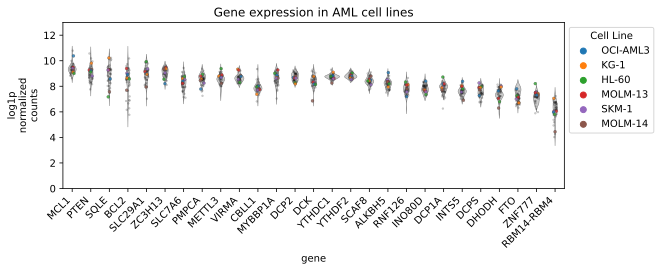

In [73]:
fig, ax = plt.subplots(figsize=(9,3))

sns.violinplot(data=df, x="gene", y="expression", linewidth=.5, inner=None, color=".8", fill=False)
# Add individual data points
sns.stripplot(data=df.query('name == "other"').copy(), jitter=True,x="gene", y="expression", size=2,linewidth=.3,color='black', alpha=.2)
sns.stripplot(data=df.query('name != "other"').copy(), jitter=True,x="gene", y="expression", size=3,linewidth=.3,hue="name", alpha=.8)

ax.legend(title='Cell Line')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.set_ylim(bottom=-9,top=75)
ax.set_ylim(bottom=0,top=13)
ax.set_ylabel('log1p\nnormalized\ncounts')
ax.set_title('Gene expression in AML cell lines')

plt.savefig('aml-panel-gene-expression.pdf')
plt.show()

## mutation

In [30]:
# leukemia = can.Cancer("Leukemia")

In [31]:
# dnmt1_mt, dnmt1_wt = mt_wt_objs(leukemia, ['DNMT1'])

In [32]:
# mt_effect, wt_effect = gene_effect_scatter(
#     dnmt1_mt, dnmt1_wt,return_effect=True,plot=False
# )

In [33]:
# labels = intersection (
#     mt_effect[mt_effect <= 0.45].index.tolist(),wt_effect[wt_effect >= 0.7].index.tolist()
# ) + intersection (mt_effect[mt_effect >= 0.65].index.tolist(),wt_effect[wt_effect <= 0.3].index.tolist())

In [34]:
# gene_effect_scatter(
#     dnmt1_mt, dnmt1_wt,
#     genes=['DHODH'],
#     name_scatter='DNMTs',
#     # name='DNA-RNA-mtyl-m6A-scatter.pdf'
# )

# # run_enrichment(labels)

___

In [36]:
aml_mu = dict([(gene, can.data.cell_lines.loc[cell_lines,'cell_line_name'].to_list()) for gene, cell_lines in aml.mutated(output='dict').items()])

In [37]:
pd.DataFrame(can.CellLine('HL-60').mutated(output='dataframe')).query('gene=="TP53"')

,gene,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC


In [38]:
our_aml_panel_mu = pd.concat(dict([
    (line_name,
     pd.DataFrame(can.CellLine(line).mutated(output='dataframe').groupby(['Variant_Classification','gene']).size())
    )
    for line, line_name in our_aml_panel.items()
])).rename(columns={0:'mutation'}).reset_index(names=['cell_line','Variant_Classification','gene'])

In [39]:
our_aml_panel_mu.cell_line.unique()

array(['HL-60', 'OCI-AML3', 'MOLM-13', 'SKM-1', 'KG-1', 'MOLM-14'],
      dtype=object)

___

In [40]:
loss_of_function = [
    'Frame_Shift_Del',
    'Frame_Shift_Ins', 
    # 'In_Frame_Del',
    'Missense_Mutation',
    # 'Nonsense_Mutation', 
    # 'Nonstop_Mutation',
    'Splice_Site',
    'Start_Codon_SNP',
    'De_novo_Start_OutOfFrame',
    'In_Frame_Ins', 
    'Stop_Codon_Del', 
    'Stop_Codon_Ins'
]

In [41]:
our_aml_panel_mu_filt = our_aml_panel_mu[our_aml_panel_mu.Variant_Classification.isin(loss_of_function)]

In [42]:
mu_stats = our_aml_panel_mu_filt.groupby(
    ['gene','Variant_Classification']
).apply(
    lambda x: ', '.join(x['cell_line'])
).reset_index(name='cell_lines')

# mu_stats['n_cell_lines'] = mu_stats.cell_lines.str.count(',')+1
# mu_stats = mu_stats.sort_values(by=['n_cell_lines','cell_lines'],ascending=False).reset_index(drop=True)
                                                                                                        
mu_stats.query(f'gene in {gene_panel}')

# mu_stats_v2 = mu_stats.groupby(['n_cell_lines','cell_lines']).apply(
#     lambda x: ', '.join(x['gene'])
# ).reset_index(name='mutated_genes').sort_values(by=['n_cell_lines','cell_lines'],ascending=False).reset_index(drop=True)

# mu_stats_v2['n_genes'] = mu_stats_v2.mutated_genes.str.count(',')+1

# mu_stats_v2#.to_excel('aml-panel-mut.xlsx').set_index('gene')

,gene,Variant_Classification,cell_lines
208,DCPS,Missense_Mutation,HL-60
506,MYBBP1A,Missense_Mutation,"MOLM-13, MOLM-14"
628,PMPCA,Missense_Mutation,HL-60


https://www.cell.com/cancer-cell/pdf/S1535-6108(22)00588-8.pdf

In [43]:
our_aml_panel_mu_mat = our_aml_panel_mu_filt.pivot_table(index='cell_line',columns='gene',values='mutation').fillna(0).astype(int)

our_aml_panel_mu_mat = our_aml_panel_mu_mat[our_aml_panel_mu_mat.sum().sort_values(ascending=False).index]

our_aml_panel_mu_mat_zeros = pd.DataFrame(0,columns=list(set(gene_panel) - set(our_aml_panel_mu_mat.columns)),index=our_aml_panel_mu_mat.index)
our_aml_panel_mu_mat = pd.concat([our_aml_panel_mu_mat,our_aml_panel_mu_mat_zeros],axis=1)

In [44]:
# [gene in c5_go_gmt['GOBP_MRNA_PROCESSING'] for gene in gene_panel]

In [45]:
# len(c5_go_gmt['GOBP_MRNA_PROCESSING'])

In [46]:
# our_aml_panel_mu_mat_GOBP_MRNA_PROCESSING = our_aml_panel_mu_mat.loc[:,our_aml_panel_mu_mat.columns.isin(
#     c5_go_gmt['GOBP_MRNA_PROCESSING']
# )]

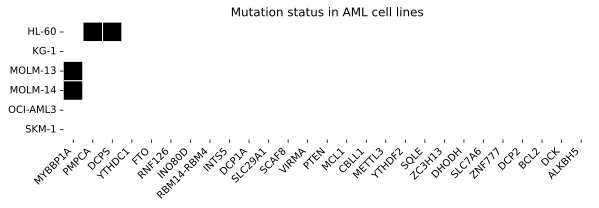

In [69]:
fig, ax = plt.subplots(figsize=(30,3))

sns.heatmap(
    our_aml_panel_mu_mat.loc[:,our_aml_panel_mu_mat.columns.isin(gene_panel)].gt(0).astype(int),
    cbar=False,
    square=True,
    cmap = "Greys",
    linewidths=1,
    ax=ax
)
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(5)
ax.set_ylabel('')
ax.set_title('Mutation status in AML cell lines')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('mutation_binary_heatmap.pdf')
plt.show()

# 

In [49]:
%load_ext watermark

In [50]:
%watermark

Last updated: 2024-02-19T23:29:06.306665-08:00

Python implementation: CPython
Python version       : 3.9.18
IPython version      : 8.15.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 3.10.0-957.27.2.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit



In [51]:
%watermark --iversions

sys       : 3.9.18 | packaged by conda-forge | (main, Aug 30 2023, 03:49:32) 
[GCC 12.3.0]
matplotlib: 3.8.0
numpy     : 1.26.0
seaborn   : 0.12.2
pandas    : 2.1.1

